In [1]:
import multi_experiment
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python2.7/dist-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


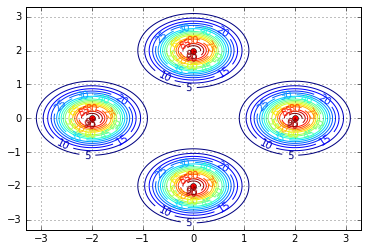

In [2]:
dqn_hidden_spec = [
                {'dim': 256,'activation': tf.nn.tanh},
                {'dim': 256,'activation': tf.nn.tanh},
                {'dim': 256,'activation': tf.nn.tanh},
                {'dim': 256,'activation': tf.nn.tanh}
            ]
exp = multi_experiment.Experiments(action_res=[5,5],discount=0.7,dqn_hidden_spec=dqn_hidden_spec,max_epi=10000,max_step=20,
                             batch_size=2000,learning_rate=1e-4,target_update_period=25,
                             replay_memory_size=50000,eps_decay_rate=0.0, strategy="Softmax",scale=5.)
fig = plt.figure()
exp.env.render()

In [3]:
_ = exp.run(display_period=500)

[500/10000] Avg Total Reward 92.6476906481, DQN Loss 2.79239427298, Epsilon 0.0
[1000/10000] Avg Total Reward 478.196857319, DQN Loss 2.08754351735, Epsilon 0.0
[1500/10000] Avg Total Reward 603.670774921, DQN Loss 5.84598228335, Epsilon 0.0
[2000/10000] Avg Total Reward 618.348763898, DQN Loss 2.61789681762, Epsilon 0.0
[2500/10000] Avg Total Reward 631.303561175, DQN Loss 1.86335522309, Epsilon 0.0


KeyboardInterrupt: 

Evaluation Result: 641.409256001


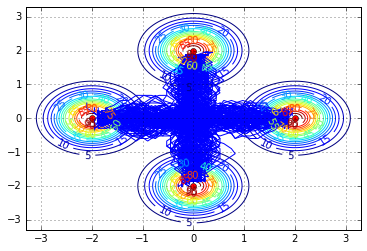

In [4]:
eval_list, info_list = exp.evaluation(max_eval_epi=500)
exp.env.plot_paths(info_list)

In [5]:
info_list

[{'env_infos': {'goal_id': array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
          -1., -1., -1., -1., -1., -1., -1., -1.]),
   'pos': array([[  0.00000000e+00,   0.00000000e+00],
          [ -1.50000000e-01,   7.50000000e-02],
          [ -3.00000000e-01,  -7.50000000e-02],
          [ -4.50000000e-01,  -7.50000000e-02],
          [ -6.00000000e-01,  -2.25000000e-01],
          [ -7.50000000e-01,  -7.50000000e-02],
          [ -9.00000000e-01,   7.50000000e-02],
          [ -1.05000000e+00,   1.50000000e-01],
          [ -1.20000000e+00,   2.25000000e-01],
          [ -1.35000000e+00,   7.50000000e-02],
          [ -1.50000000e+00,  -4.16333634e-17],
          [ -1.65000000e+00,  -4.16333634e-17],
          [ -1.80000000e+00,  -7.50000000e-02],
          [ -1.87500000e+00,  -5.55111512e-17],
          [ -1.87500000e+00,   7.50000000e-02],
          [ -1.87500000e+00,   1.50000000e-01],
          [ -1.87500000e+00,   2.25000000e-01],
          [ -1.87500000e+0